# Image Processing using Fourier Transform

In this notebook, we'll perform various image processing operations using Fourier Transform. We'll explore:
1. 2D Fast Fourier Transform (FFT)
2. Frequency domain visualization
3. Low-pass and High-pass filtering
4. Edge detection using frequency domain filters

Let's start by importing the required libraries and loading our test image.

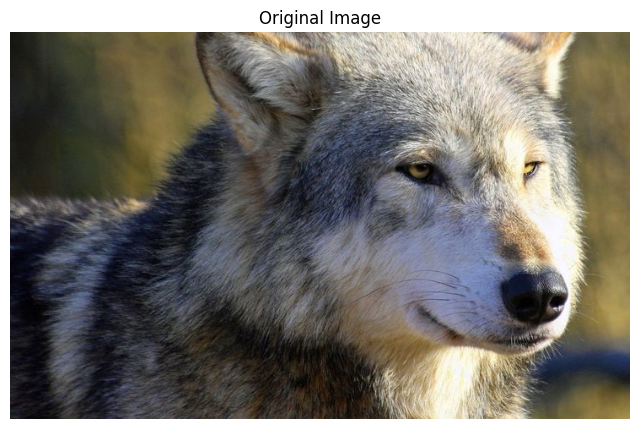

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2


img = cv2.imread('wolf.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

## 1. Two-dimensional Fast Fourier Transform

Now we'll apply 2D FFT to decompose the image into its frequency components. The Fourier transform will help us analyze the image in the frequency domain.

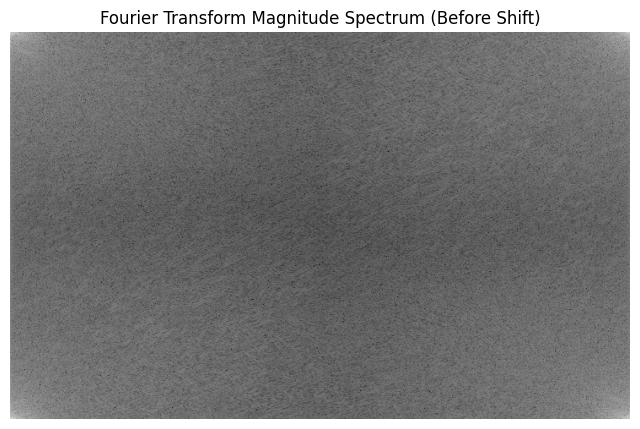

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Apply 2D FFT
def apply_fft(img):
    f_transform = np.fft.fft2(img)
    return f_transform

def display_spectrum(f_transform, title):
    magnitude_spectrum = 20 * np.log(np.abs(f_transform) + 1)
    plt.figure(figsize=(8, 8))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Apply FFT and display spectrum
f_transform = apply_fft(img)
display_spectrum(f_transform, 'Fourier Transform Magnitude Spectrum (Before Shift)')

## 2. Shift Low Frequency Components to Center

Now we'll shift the low-frequency components to the center of the image. This is a common practice in Fourier analysis as it makes the frequency spectrum more intuitive to interpret.

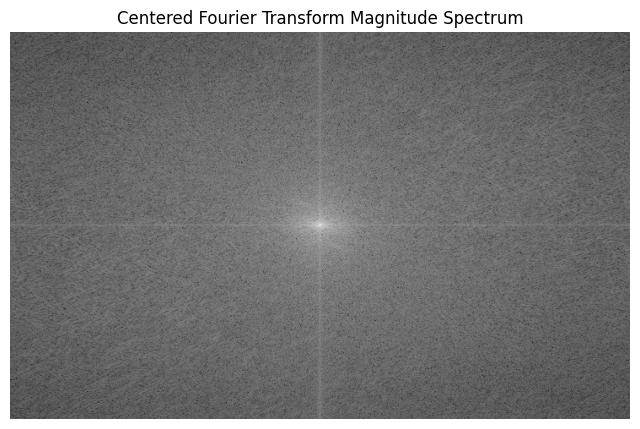

In [ ]:
# Function to shift frequency components
def shift_frequencies(f_transform):
    return np.fft.fftshift(f_transform)


f_transform_shifted = shift_frequencies(f_transform)
display_spectrum(f_transform_shifted, 'Centered Fourier Transform Magnitude Spectrum')

## 3-6. Ideal Low Pass Filter and Edge Detection

Now we'll create an ideal low pass filter, apply it to the shifted frequency spectrum, and then perform inverse FFT to get back to the spatial domain.

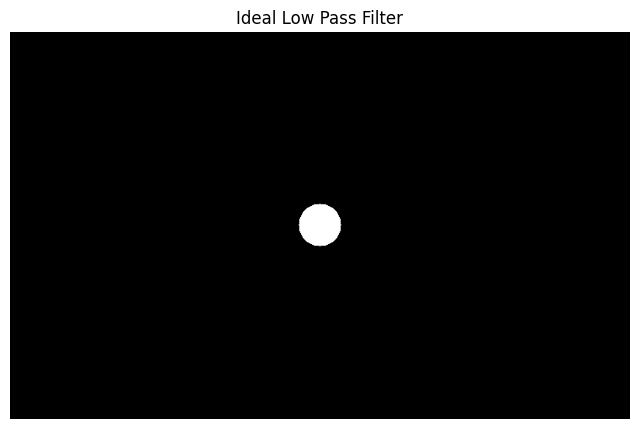

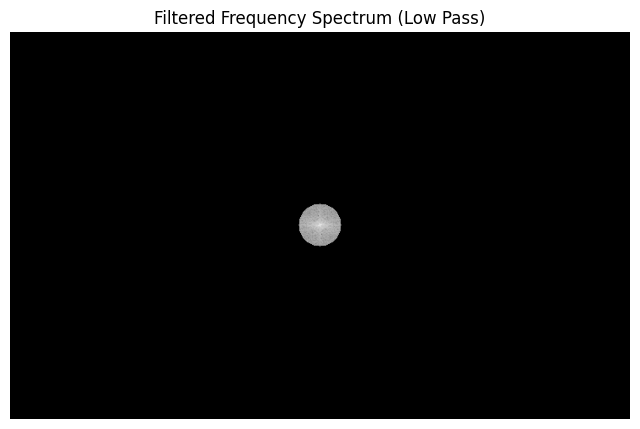

In [116]:
# Function to create ideal low pass filter
def create_low_pass_filter(shape, radius):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols))
    
    y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]
    mask_area = x*x + y*y <= radius*radius
    mask[mask_area] = 1
    return mask

# Create and apply low pass filter
radius = 25 
low_pass_filter = create_low_pass_filter(img.shape, radius)

# Display the filter
plt.figure(figsize=(8, 8))
plt.imshow(low_pass_filter, cmap='gray')
plt.title('Ideal Low Pass Filter')
plt.axis('off')
plt.show()

# Apply filter to shifted frequency domain
filtered_freq = f_transform_shifted * low_pass_filter

# Display filtered frequency spectrum
display_spectrum(filtered_freq, 'Filtered Frequency Spectrum (Low Pass)')

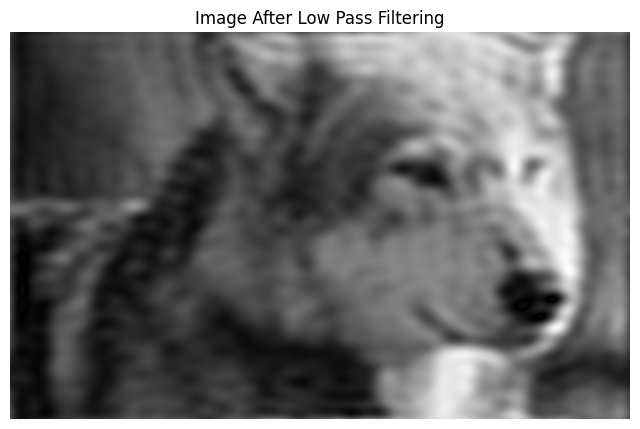

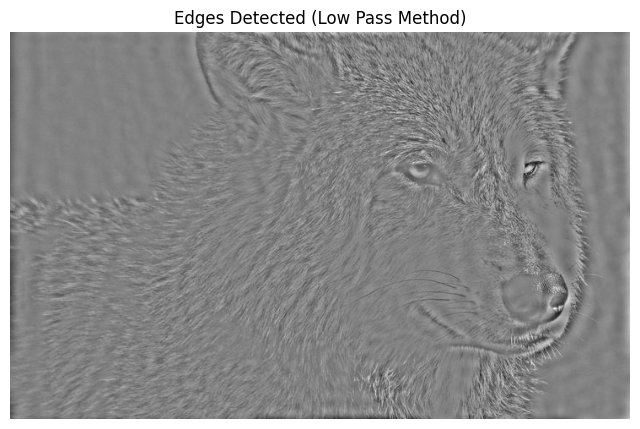

In [117]:
# Inverse shift and inverse FFT
filtered_image_freq = np.fft.ifftshift(filtered_freq)
filtered_image = np.fft.ifft2(filtered_image_freq)
filtered_image = np.abs(filtered_image)

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(filtered_image, cmap='gray')
plt.title('Image After Low Pass Filtering')
plt.axis('off')
plt.show()

# Edge detection by subtracting filtered image from original
edges_low = img - filtered_image
plt.figure(figsize=(8, 8))
plt.imshow(edges_low, cmap='gray')
plt.title('Edges Detected (Low Pass Method)')
plt.axis('off')
plt.show()

## 7-10. Ideal High Pass Filter and Edge Detection

Now we'll create an ideal high pass filter, apply it to the shifted frequency spectrum, and then perform inverse FFT to get back to the spatial domain.

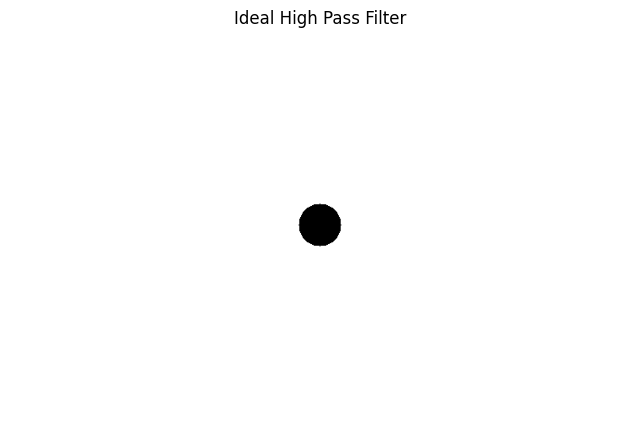

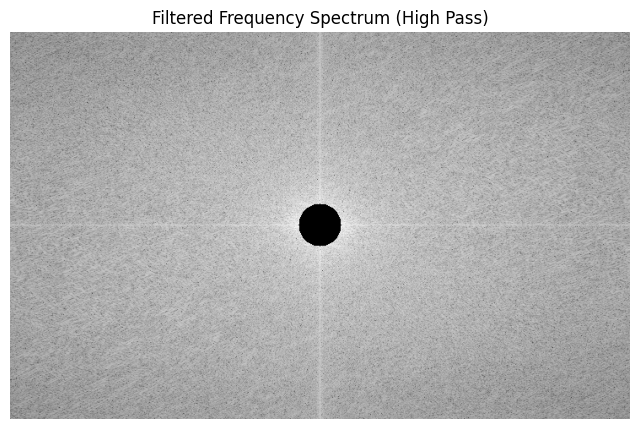

In [118]:
# Function to create ideal high pass filter
def create_high_pass_filter(shape, radius):
    return 1 - create_low_pass_filter(shape, radius)

# Create and apply high pass filter
high_pass_filter = create_high_pass_filter(img.shape, radius)

# Display the filter
plt.figure(figsize=(8, 8))
plt.imshow(high_pass_filter, cmap='gray')
plt.title('Ideal High Pass Filter')
plt.axis('off')
plt.show()

# Apply filter in frequency domain
high_filtered_freq = f_transform_shifted * high_pass_filter

# Display filtered frequency spectrum
display_spectrum(high_filtered_freq, 'Filtered Frequency Spectrum (High Pass)')



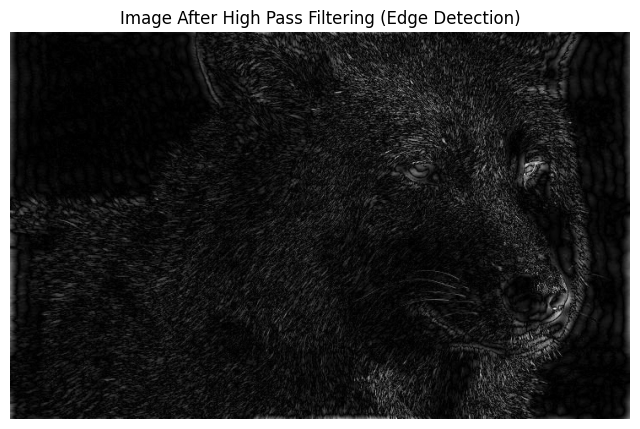

In [119]:
# Inverse shift and inverse FFT
high_filtered_image_freq = np.fft.ifftshift(high_filtered_freq)
high_filtered_image = np.fft.ifft2(high_filtered_image_freq)
high_filtered_image = np.abs(high_filtered_image)

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(high_filtered_image, cmap='gray')
plt.title('Image After High Pass Filtering (Edge Detection)')
plt.axis('off')
plt.show()



## Implementation Analysis and Concept Clarity

Let's break down the key concepts and implementation details:

1. **Implementation (Built-in & User-defined functions)**:
   - Built-in functions: `np.fft.fft2`, `np.fft.ifft2`, `np.fft.fftshift`, `np.fft.ifftshift`
   - User-defined functions: `load_image`, `apply_fft`, `display_spectrum`, `create_low_pass_filter`, `create_high_pass_filter`

2. **Key Concepts**:
   - Fourier Transform decomposes images into frequency components
   - Low frequencies represent slow variations (smooth areas)
   - High frequencies represent rapid variations (edges)
   - Low-pass filters preserve smooth areas and remove noise
   - High-pass filters enhance edges and details